# **Task 1: Data Collection & Cleaning**
WEEK 1  
# Dataset Chosen: COVID-19 World Vaccination Progress from ***Kaggle***

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('country_vaccinations.csv')

numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

df['vaccines'].fillna(method='ffill', inplace=True)
df['source_name'].fillna(method='ffill', inplace=True)
df['source_website'].fillna(method='ffill', inplace=True)

df.drop_duplicates(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['country'] = df['country'].str.lower().str.strip()

print("Data cleaned successfully!")
print("Final shape:", df.shape)
print(df.isnull().sum())
df.head()


/tmp/ipython-input-2-4006462696.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vaccines'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-2-4006462696.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['vaccines'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-2-4006462696.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Th

Data cleaned successfully!
Final shape: (86512, 15)
country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,afghanistan,AFG,2021-02-22,0.0,0.0,1722140.5,25309.0,7343.0,0.00,0.000,31.75,2050.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,afghanistan,AFG,2021-02-23,3590096.0,2187310.5,1722140.5,25309.0,1367.0,67.52,41.435,31.75,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,afghanistan,AFG,2021-02-24,3590096.0,2187310.5,1722140.5,25309.0,1367.0,67.52,41.435,31.75,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,afghanistan,AFG,2021-02-25,3590096.0,2187310.5,1722140.5,25309.0,1367.0,67.52,41.435,31.75,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,afghanistan,AFG,2021-02-26,3590096.0,2187310.5,1722140.5,25309.0,1367.0,67.52,41.435,31.75,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


# TASK 2 :-  EXPLORATORY DATA ANALYSIS

/tmp/ipython-input-3-2664882523.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vaccines'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-3-2664882523.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['vaccines'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-3-2664882523.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.


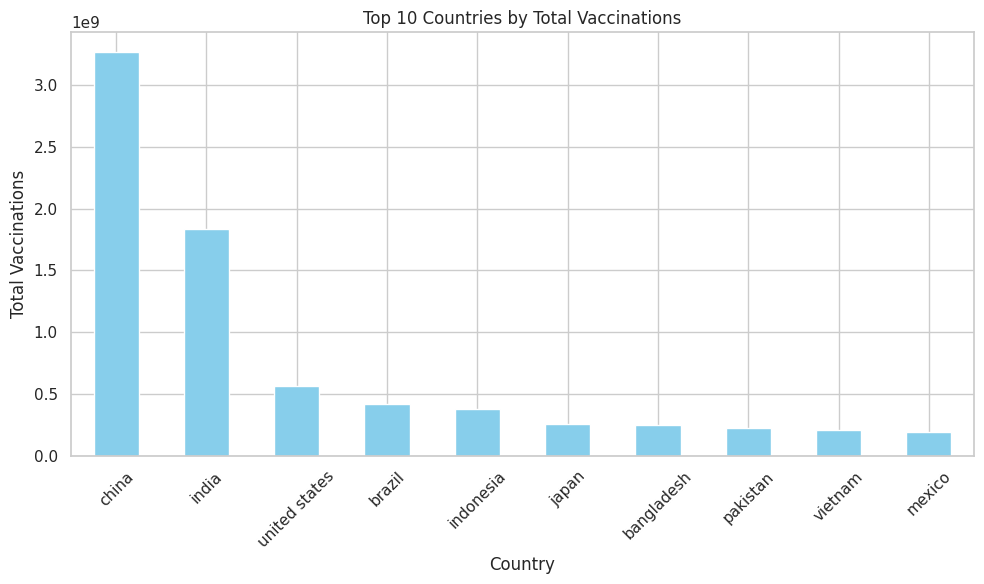

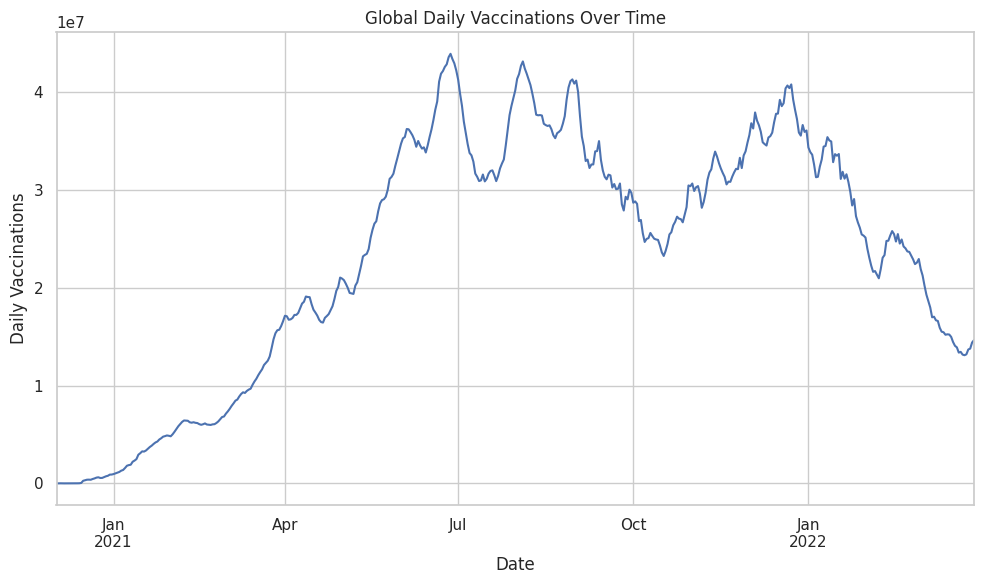

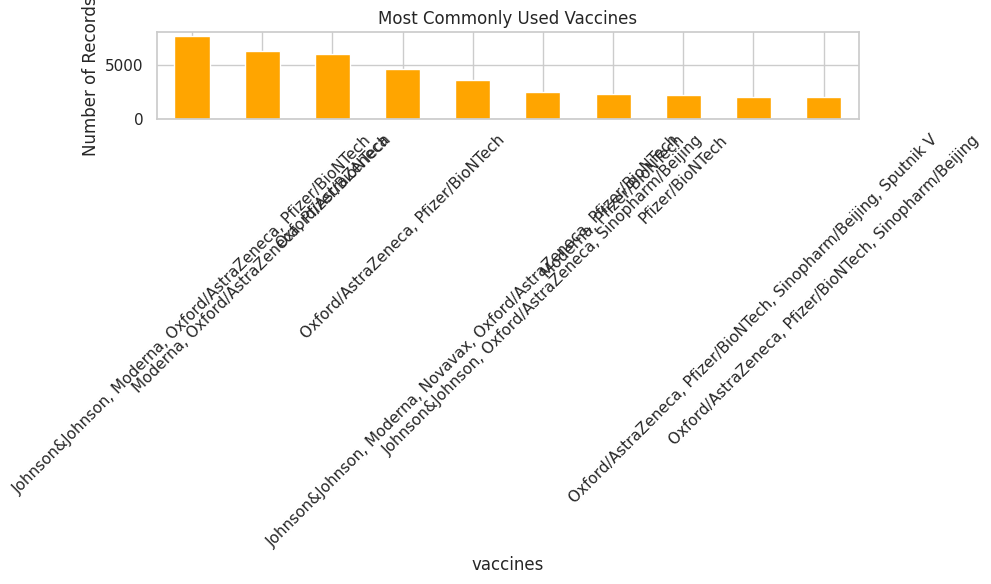

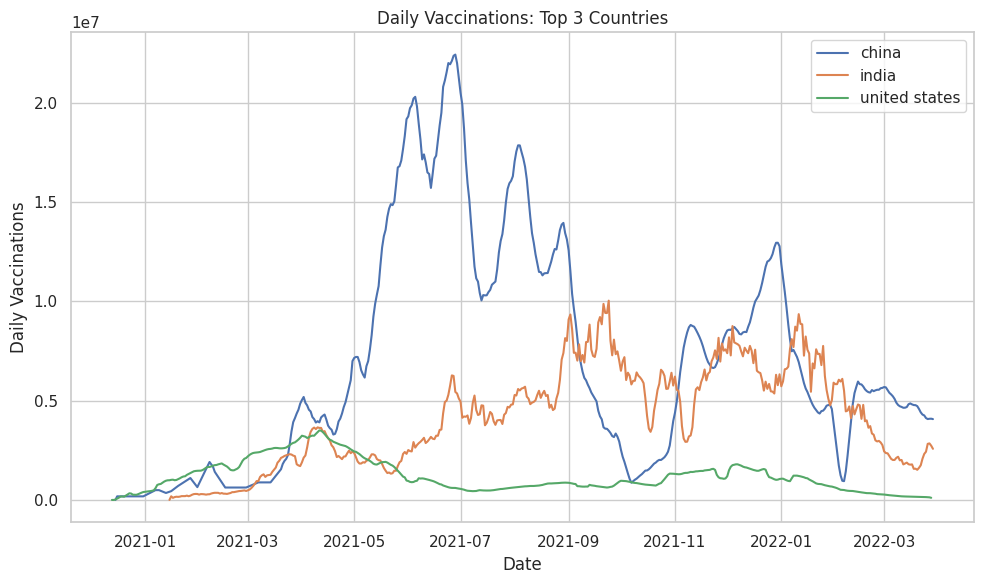

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('country_vaccinations.csv')

# Pre-cleaning (optional, if coming from previous session)
df['date'] = pd.to_datetime(df['date'])
df['country'] = df['country'].str.lower().str.strip()

# Fill missing numeric values
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing text
df['vaccines'].fillna(method='ffill', inplace=True)
df['source_name'].fillna(method='ffill', inplace=True)
df['source_website'].fillna(method='ffill', inplace=True)

df.drop_duplicates(inplace=True)

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Top 10 countries by total vaccinations
top_total = df.groupby('country')['total_vaccinations'].max().sort_values(ascending=False).head(10)
top_total.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Total Vaccinations")
plt.xlabel("Country")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Global daily vaccinations over time
global_daily = df.groupby('date')['daily_vaccinations'].sum()
global_daily.plot()
plt.title("Global Daily Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations")
plt.tight_layout()
plt.show()

# 3. Most common vaccines used
vaccine_counts = df['vaccines'].value_counts().head(10)
vaccine_counts.plot(kind='bar', color='orange')
plt.title("Most Commonly Used Vaccines")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Daily vaccination trend for top 3 countries
top_countries = top_total.head(3).index
for country in top_countries:
    country_df = df[df['country'] == country]
    plt.plot(country_df['date'], country_df['daily_vaccinations'], label=country)
plt.title("Daily Vaccinations: Top 3 Countries")
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()
